# Implement a Neural Network Using Keras

In [1]:
import pandas as pd
import numpy as np
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
import time

In [2]:
filename = os.path.join(os.getcwd(), "data", "airbnbData_train.csv")
df = pd.read_csv(filename, header=0)

In [3]:
boolean_cols = df.select_dtypes(include = "bool").columns
df[boolean_cols] = df[boolean_cols].astype(float)

In [4]:
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,1.0,1.0,1.0,0.0,-0.578829,-2.845589,-0.054298,-0.054298,-1.007673,...,1.888373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,-4.685756,-0.430024,-0.112284,-0.112284,0.067470,...,0.409419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.578052,-2.473964,-0.112284,-0.112284,0.605041,...,-1.069535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.578052,1.010024,-0.112284,-0.112284,-0.470102,...,-0.576550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,-0.054002,-0.066308,-0.112284,-0.112284,-1.007673,...,0.902404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
y = df["host_is_superhost"]
X = df.drop(columns = "host_is_superhost")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
X_train.shape

(21016, 49)

#### Construct the Neural Network


In [8]:
nn_model = keras.Sequential()

input_shape = X_train.shape[1:]

# Create input layer:
input_layer = keras.layers.InputLayer(input_shape)

# Add input_layer to the model object:
nn_model.add(input_layer)

# Create hidden layer:
hidden_layer_1 = keras.layers.Dense(units=64,activation='relu')
# Add hidden_layer_1 to the model object:
nn_model.add(hidden_layer_1)

# Create hidden layer 2:
hidden_layer_2 = keras.layers.Dense(units=32,activation='relu')
# Add hidden_layer_2 to the model object:
nn_model.add(hidden_layer_2)

# Create hidden layer 3:
hidden_layer_3 = keras.layers.Dense(units=16,activation='relu')
# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_3)

# Create output layer:
output_layer = keras.layers.Dense(units=1,activation='sigmoid')
# Add output_layer to the model object:
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Define the optimization function
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

In [10]:
# Define the loss function
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

In [11]:
# Compile the model
nn_model.compile(optimizer = sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [12]:
# Fit model to training data
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [13]:
t0 = time.time() # start time

num_epochs = 100 # epochs

history = nn_model.fit(X_train, y_train, epochs=num_epochs, verbose=0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)], validation_split=0.2)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 100], Accuracy: 0.8371, Loss: 0.3634, Val_accuracy: 0.8321, Val_loss: 0.3640
Epoch [10/ 100], Accuracy: 0.8489, Loss: 0.3397, Val_accuracy: 0.8366, Val_loss: 0.3623
Epoch [15/ 100], Accuracy: 0.8557, Loss: 0.3213, Val_accuracy: 0.8430, Val_loss: 0.3540
Epoch [20/ 100], Accuracy: 0.8633, Loss: 0.3066, Val_accuracy: 0.8349, Val_loss: 0.3811
Epoch [25/ 100], Accuracy: 0.8713, Loss: 0.2945, Val_accuracy: 0.8325, Val_loss: 0.3764
Epoch [30/ 100], Accuracy: 0.8756, Loss: 0.2804, Val_accuracy: 0.8302, Val_loss: 0.4107
Epoch [35/ 100], Accuracy: 0.8767, Loss: 0.2785, Val_accuracy: 0.8140, Val_loss: 0.4163
Epoch [40/ 100], Accuracy: 0.8876, Loss: 0.2582, Val_accuracy: 0.8328, Val_loss: 0.4231
Epoch [45/ 100], Accuracy: 0.8906, Loss: 0.2525, Val_accuracy: 0.8354, Val_loss: 0.4226
Epoch [50/ 100], Accuracy: 0.8958, Loss: 0.2403, Val_accuracy: 0.8183, Val_loss: 0.4450
Epoch [55/ 100], Accuracy: 0.9017, Loss: 0.2274, Val_accuracy: 0.8190, Val_loss: 0.4539
Epoch [60/ 100], Accuracy: 0.9029

In [14]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

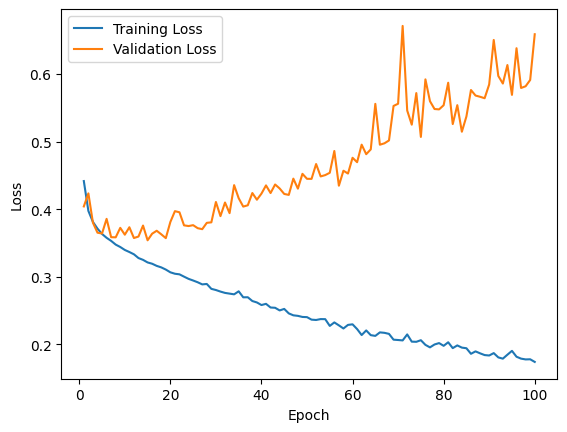

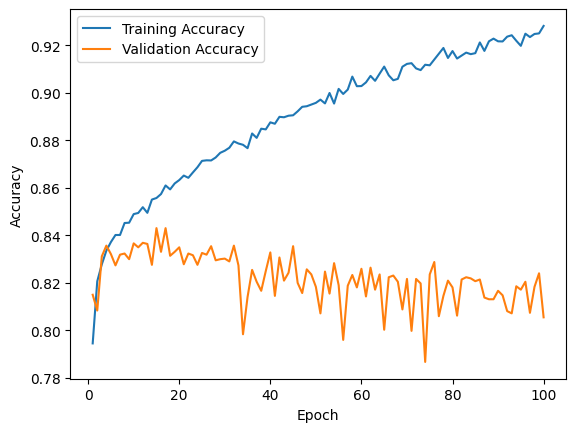

In [15]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
# Evaluate performance
loss, accuracy = nn_model.evaluate(X_test, y_test)

print('Loss: {0} Accuracy: {1}'.format(loss, accuracy))

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8248 - loss: 0.5796
Loss: 0.5867758989334106 Accuracy: 0.8174421787261963


In [17]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test)
class_label_predictions=[]

for i in range(0,len(y_test)):
    if probability_predictions[i] >= 0.6:
        class_label_predictions.append(1)
    else:
        class_label_predictions.append(0)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


In [19]:
# Confusion matrix
confusion_matrix(y_test, class_label_predictions)

array([[4802,  498],
       [ 762,  944]], dtype=int64)